In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [122]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
user_data.shape

(2954, 3)

In [6]:
logs.shape

(4500, 4)

In [14]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [15]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [24]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [25]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [19]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [20]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [42]:
#клиенты с наибольшим числом успешных операций
top_clients = logs.query('success == True') \
                  .groupby('client', as_index=False) \
                  .agg({'success': 'count'}) \
                  .sort_values('success', ascending=False).head(9)

top_clients.client.sort_values().tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [43]:
#платформы по числу успешных операций
logs.query('success == True') \
    .groupby('platform') \
    .agg({'client': 'count'})

,client
platform,
computer,1090
phone,2019
tablet,180


In [48]:
#объединим два датасета
full_data = user_data.merge(logs, how='inner', on='client')
#платформы по популярности среди премиумных клиентов
full_data.query('premium == True') \
         .groupby('platform') \
         .agg({'client': 'count'}) \
         .rename(columns={'client': 'use'})

,use
platform,
computer,150
phone,246
tablet,24


C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

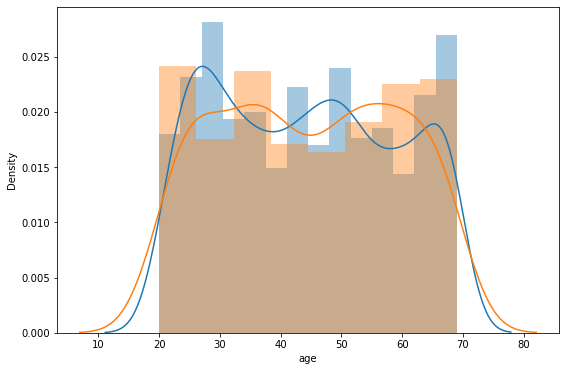

In [59]:
#распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
plt.figure(figsize=(9, 6))
sns.distplot(full_data.query('premium == False').age, kde=True)
sns.distplot(full_data.query('premium == True').age, kde=True)

C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

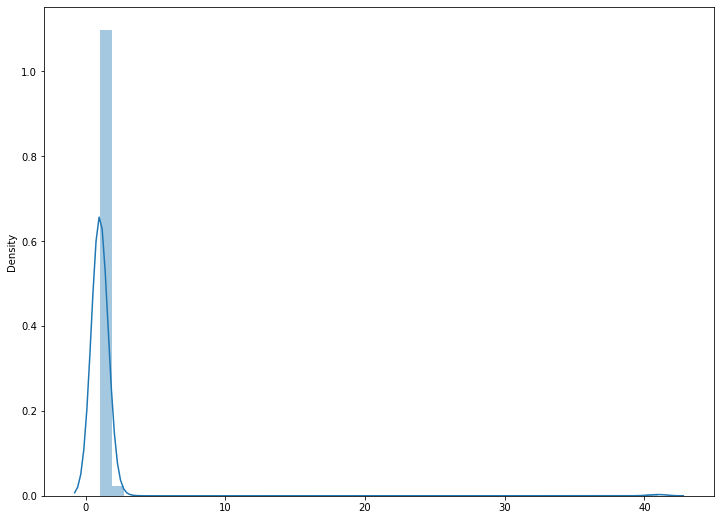

In [99]:
#клиенты по числу успешных операций
clients_by_successful_op = full_data.query('success == True') \
                                    .groupby('client') \
                                    .agg({'success': 'count'})

#распределениe числа успешных операций
plt.figure(figsize=(12, 9))
sns.distplot(clients_by_successful_op)

In [103]:
#число успешных операций, сделанных на платформе computer, в зависимости от возраста
computer_users_by_successful_op = full_data.query('success == True and platform == "computer"') \
                                           .groupby('age', as_index=False) \
                                           .agg({'client': 'count'}) \
                                           .rename(columns={'client': 'operations'})


<AxesSubplot:xlabel='age', ylabel='operations'>

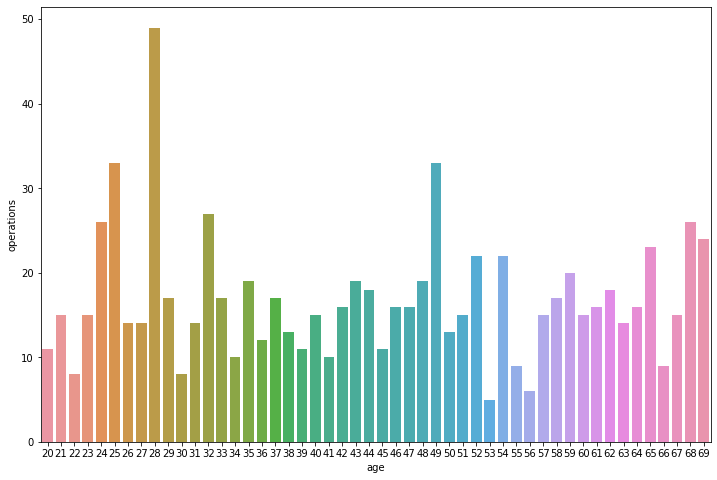

In [110]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='operations', data=computer_users_by_successful_op)